#Linear Regression on Ecommerce Data

In [54]:
#Importing Required Library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LinearRegression
from sklearn.model_selection import cross_validate
sns.set()

In [2]:
data=pd.read_csv("/content/Ecommerce Customers")

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Data is cleaned 

In [16]:
numeric_data = data.select_dtypes(include=[np.number])

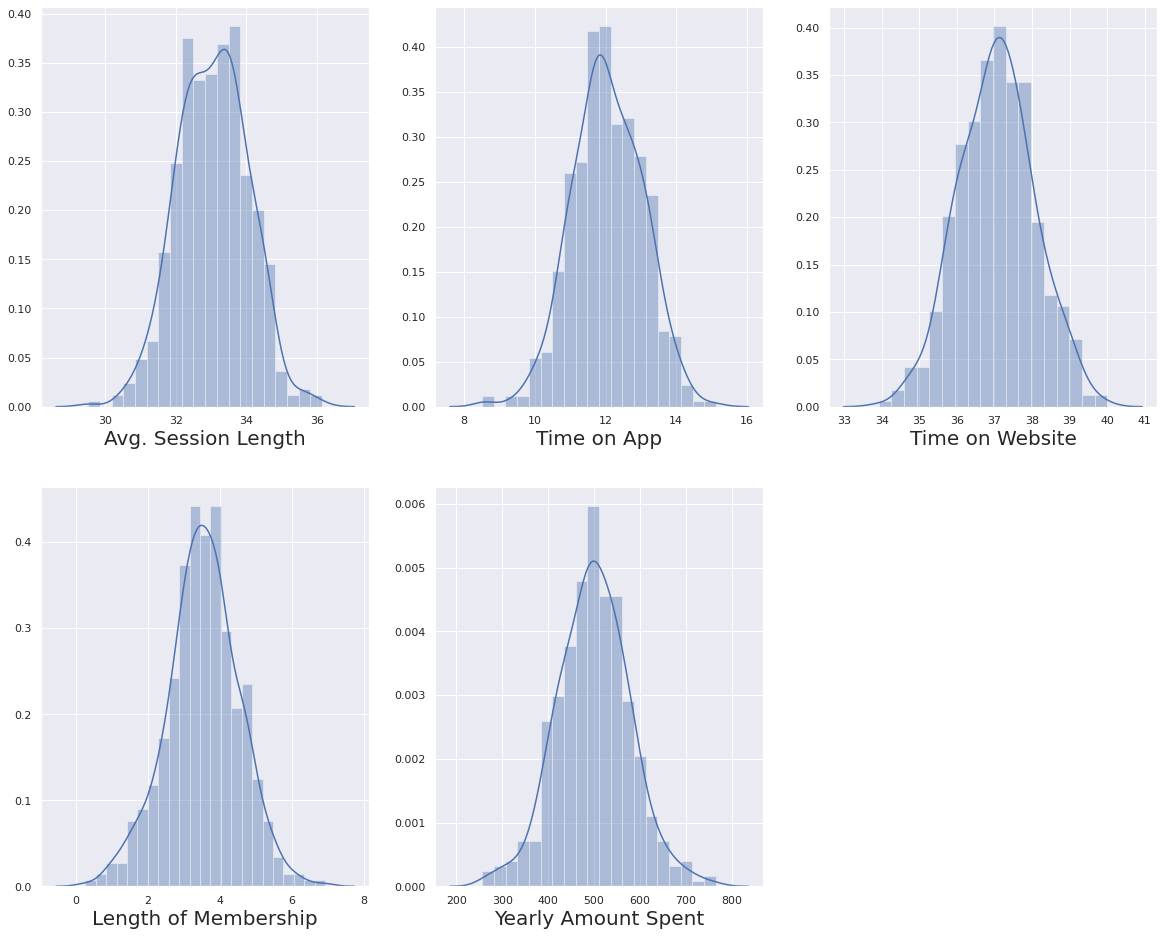

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(numeric_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

 There is no skewness in data,It looks normal

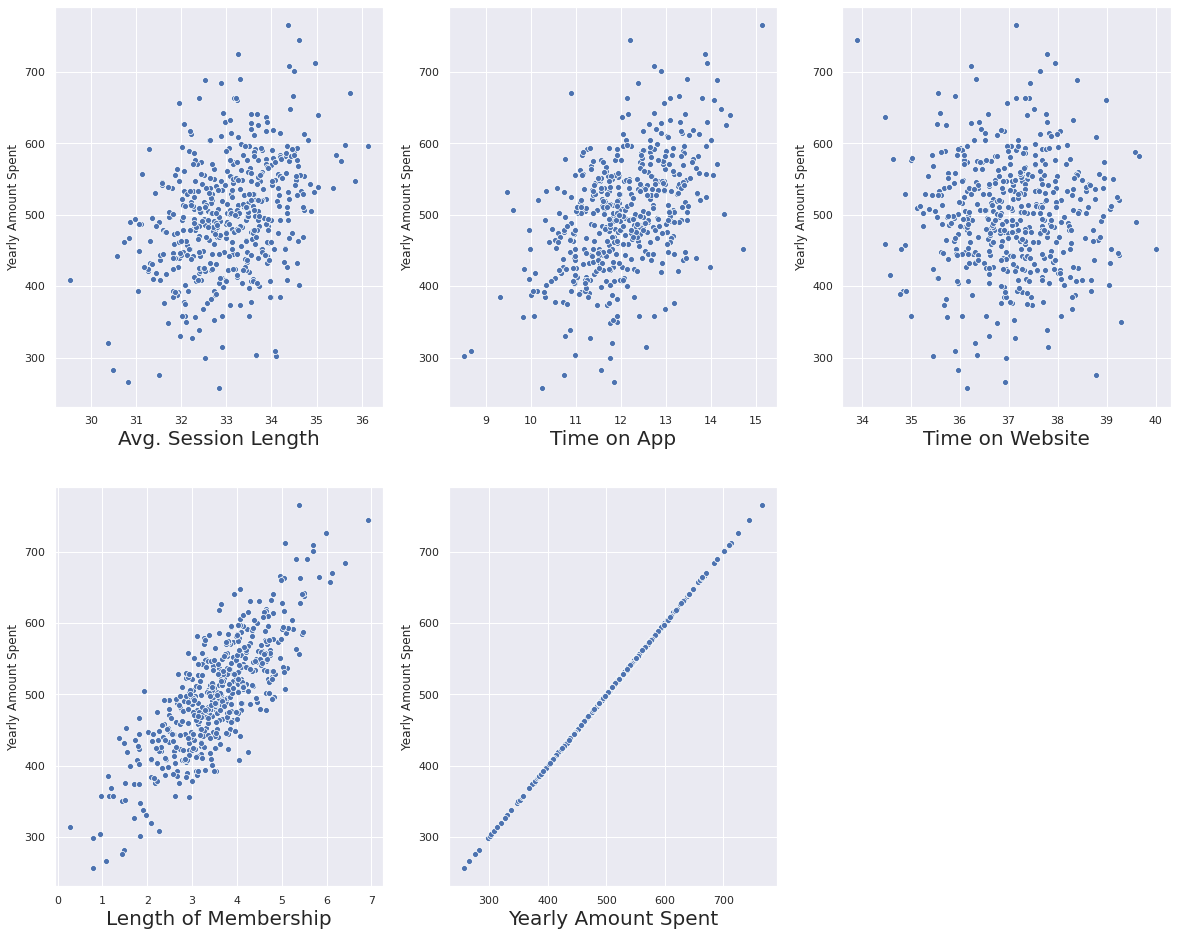

In [55]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=5 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(numeric_data[column],numeric_data["Yearly Amount Spent"])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

Linear Relation is present 

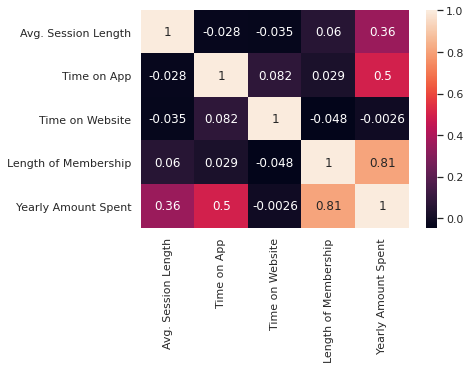

In [22]:
sns.heatmap(numeric_data.corr(),annot=True)


Time on website has no relation with yearly amount spent 

In [25]:
data["Avatar"].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

In [29]:
data["Avatar"].value_counts(sort=True)

Cyan             7
CadetBlue        7
SlateBlue        7
Teal             7
GreenYellow      7
                ..
NavajoWhite      1
Coral            1
PapayaWhip       1
PaleGoldenRod    1
LawnGreen        1
Name: Avatar, Length: 138, dtype: int64

There are too many Categries in Avatar

In [31]:
labelencoder = LabelEncoder()

In [32]:
data["Avatar"]=labelencoder.fit_transform(data["Avatar"])

In [34]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    int64  
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 31.4+ KB


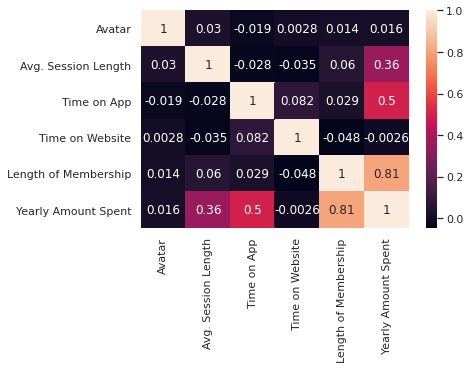

In [35]:
sns.heatmap(data.corr(),annot=True)

Aavtar is not related with Yearly amount spent

#Divinding data into Independent and dependent Features 

In [37]:
x=data[["Avg. Session Length","Time on App","Length of Membership"]]
y=data["Yearly Amount Spent"]

In [39]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

Data is scaled as columns had different range.

In [44]:
linearmodel=LinearRegression()

In [48]:
cross_validate(linearmodel,X_scaled,y,cv=4)

{'fit_time': array([0.02134013, 0.00103045, 0.0009675 , 0.00078273]),
 'score_time': array([0.00096369, 0.00062752, 0.00057769, 0.00057268]),
 'test_score': array([0.98207427, 0.98479687, 0.9875544 , 0.9796829 ])}

In [50]:
linearmodel.fit(X_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
linearmodel.score(X_scaled,y)

0.9842848920844948